In [1]:
import numpy
import h5py
import matplotlib
import os
from matplotlib import pyplot as plt
from pycbc.results import str_utils

In [2]:
# Read (log) evidence and errors, final mass and bounds from file

modes = ['220',
         '220_221',
         '220_221_222',
         '220_221_222_223',
         '220_330',
         '220_330_210',
         '220_330_440',
         '220_330_440_210',
         '220_330_440_550_210'
        ]

log_evidence = {}
dlog_evidence = {}

for mode in modes:
    log_evidence[mode] = {}
    dlog_evidence[mode] = {}

    tmp_array = numpy.loadtxt('../posteriors/evidence/{}_evidence.txt'.format(mode))

    for idx in range(len(tmp_array)):
        log_evidence[mode][int(tmp_array[idx,0])] = tmp_array[idx,1]
        dlog_evidence[mode][int(tmp_array[idx,0])] = tmp_array[idx,2]


params = ['final_mass', 'f220']
median_vals = {}
error_low = {}
error_high = {}

for mode in modes:
    median_vals[mode] = {}
    error_low[mode] = {}
    error_high[mode] = {}
    for param in params:
        median_vals[mode][param] = {}
        error_low[mode][param] = {}
        error_high[mode][param] = {}

        tmp_array = numpy.loadtxt('../posteriors/median_values/{}_{}.txt'.format(mode, param))

        for idx in range(len(tmp_array)):
            median_vals[mode][param][int(tmp_array[idx,0])] = tmp_array[idx,1]
            error_low[mode][param][int(tmp_array[idx,0])] = tmp_array[idx,2]
            error_high[mode][param][int(tmp_array[idx,0])] = tmp_array[idx,3]

In [3]:
# Calculate (log) Bayes factors

log_bayes_factors = {}
log_symm_err = {}
bayes_factors = {}
bf_error_high = {}
bf_error_low = {}

for mode in log_evidence:
    log_bayes_factors[mode] = {}
    log_symm_err[mode] = {}
    bayes_factors[mode] = {}
    bf_error_high[mode] = {}
    bf_error_low[mode] = {}

    for time in log_evidence[mode]:
        if not (time in log_evidence['220'] and time in log_evidence['220_221']):
            ref_mode = '220'
        else:
            # Use max of Z(220), Z(220,221) as reference
            ref_mode = ['220', '220_221'][numpy.argmax([log_evidence['220'][time], log_evidence['220_221'][time]])]
        if mode == '220_221':
            ref_mode = '220'

        log_bayes_factors[mode][time] = log_evidence[mode][time] - log_evidence[ref_mode][time]

        log_symm_err[mode][time] = numpy.sqrt(dlog_evidence[mode][time]**2 + dlog_evidence[ref_mode][time]**2)

        bf_error_high[mode][time] = log_bayes_factors[mode][time] + log_symm_err[mode][time]
        bf_error_low[mode][time] = log_bayes_factors[mode][time] - log_symm_err[mode][time]

        bayes_factors[mode][time] = numpy.exp(log_bayes_factors[mode][time])
        bf_error_high[mode][time] = numpy.exp(bf_error_high[mode][time])
        bf_error_low[mode][time] = numpy.exp(bf_error_low[mode][time])

        bf_error_high[mode][time] = bf_error_high[mode][time] - bayes_factors[mode][time]
        bf_error_low[mode][time] = bayes_factors[mode][time] - bf_error_low[mode][time]

In [4]:
# Sort Bayes factors by time
log_bayes_factors_sorted = {}
log_symm_err_sorted = {}
bayes_factors_sorted = {}
bf_error_high_sorted = {}
bf_error_low_sorted = {}

for mode in bayes_factors:
    log_bayes_factors_sorted[mode] = {}
    log_symm_err_sorted[mode] = {}
    bayes_factors_sorted[mode] = {}
    bf_error_high_sorted[mode] = {}
    bf_error_low_sorted[mode] = {}

    for time in sorted(bayes_factors[mode]):
        log_bayes_factors_sorted[mode][time] = log_bayes_factors[mode][time]
        log_symm_err_sorted[mode][time] = log_symm_err[mode][time]
        bayes_factors_sorted[mode][time] = bayes_factors[mode][time]
        bf_error_high_sorted[mode][time] = bf_error_high[mode][time]
        bf_error_low_sorted[mode][time] = bf_error_low[mode][time]

log_bayes_factors = log_bayes_factors_sorted
log_symm_err = log_symm_err_sorted
bayes_factors = bayes_factors_sorted
bf_error_high = bf_error_high_sorted
bf_error_low = bf_error_low_sorted

# Sort median values and error by time
median_vals_sorted = {}
error_low_sorted = {}
error_high_sorted = {}

for mode in median_vals:
    median_vals_sorted[mode] = {}
    error_low_sorted[mode] = {}
    error_high_sorted[mode] = {}

    for param in median_vals[mode]:
        median_vals_sorted[mode][param] = {}
        error_low_sorted[mode][param] = {}
        error_high_sorted[mode][param] = {}

        for time in sorted(median_vals[mode][param]):
            median_vals_sorted[mode][param][time] = median_vals[mode][param][time]
            error_low_sorted[mode][param][time] = error_low[mode][param][time]
            error_high_sorted[mode][param][time] = error_high[mode][param][time]

median_vals = median_vals_sorted
error_low = error_low_sorted
error_high = error_high_sorted

In [5]:
# Print Bayes factors
for mode in bayes_factors:
    print(mode)
    for time in bayes_factors[mode]:
        print(time, '${0}$'.format(str_utils.format_value(
                                    bayes_factors[mode][time],
                                    bf_error_low[mode][time],
                                    plus_error=bf_error_high[mode][time])))

220
-9 $4.13^{+0.56}_{-0.49}\times 10^{-4}$
-8 $6.09^{+0.83}_{-0.73}\times 10^{-5}$
-7 $4.00^{+0.54}_{-0.48}\times 10^{-5}$
-6 $1.46^{+0.20}_{-0.18}\times 10^{-5}$
-5 $1.40^{+0.19}_{-0.17}\times 10^{-5}$
-4 $1.74^{+0.23}_{-0.21}\times 10^{-4}$
-3 $9.2^{+1.2}_{-1.1}\times 10^{-4}$
-2 $0.00224^{+0.00030}_{-0.00026}$
-1 $0.0369^{+0.0049}_{-0.0043}$
0 $0.097^{+0.013}_{-0.011}$
1 $0.083^{+0.011}_{-0.010}$
2 $0.163^{+0.021}_{-0.019}$
3 $0.093^{+0.012}_{-0.011}$
4 $0.0241^{+0.0031}_{-0.0028}$
5 $0.122^{+0.016}_{-0.014}$
6 $1.00^{+0.12}_{-0.11}$
7 $0.93^{+0.12}_{-0.10}$
8 $1.00^{+0.12}_{-0.10}$
9 $1.00^{+0.12}_{-0.10}$
10 $1.00^{+0.12}_{-0.11}$
11 $1.00^{+0.11}_{-0.10}$
12 $1.00^{+0.12}_{-0.10}$
13 $1.00^{+0.12}_{-0.10}$
14 $1.00^{+0.11}_{-0.10}$
15 $1.00^{+0.11}_{-0.10}$
16 $1.00^{+0.11}_{-0.10}$
17 $1.00^{+0.11}_{-0.10}$
18 $1.00^{+0.11}_{-0.10}$
19 $0.532^{+0.062}_{-0.055}$
20 $1.00^{+0.10}_{-0.10}$
21 $1.000^{+0.104}_{-0.094}$
22 $1.000^{+0.104}_{-0.094}$
23 $1.000^{+0.098}_{-0.090}$
24 $1

# Plot Figure 2

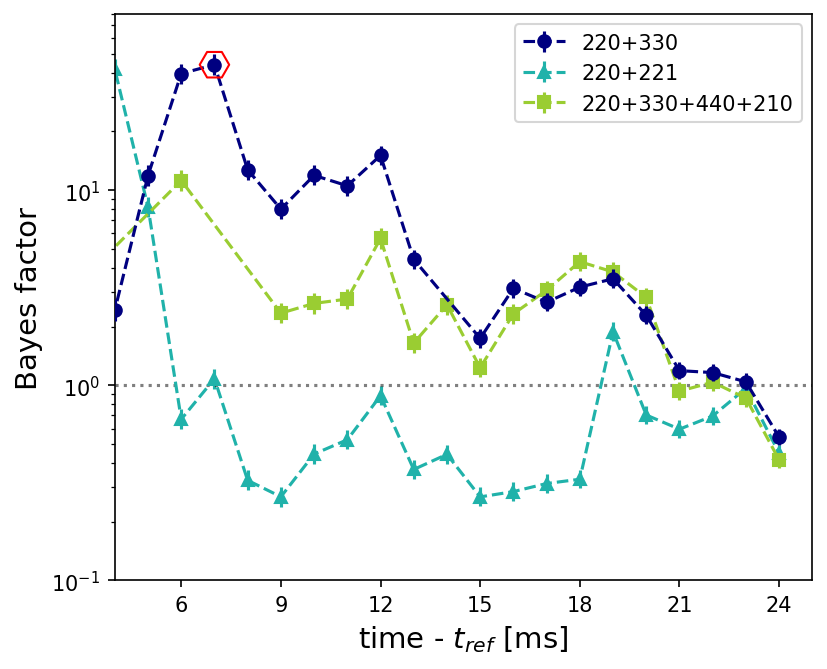

In [6]:
fig, ax = plt.subplots(figsize=(6,5), facecolor='w')

tmp_mode = '220_330'
ax.errorbar([t for t in bayes_factors[tmp_mode]],
           [bayes_factors[tmp_mode][t] for t in bayes_factors[tmp_mode]],
           yerr=[[bf_error_low[tmp_mode][t] for t in bf_error_low[tmp_mode]],
                 [bf_error_high[tmp_mode][t] for t in bf_error_high[tmp_mode]]],
           label='220+330', marker='o', ls='--', c='navy', zorder=3)

ax.scatter(7,
              bayes_factors['220_330'][7],
              marker='H',
              color='red',
              facecolor='none',
              s=200,
              zorder=4)

tmp_mode = '220_221'
ax.errorbar([t for t in bayes_factors[tmp_mode]],
           [bayes_factors[tmp_mode][t] for t in bayes_factors[tmp_mode]],
           yerr=[[bf_error_low[tmp_mode][t] for t in bf_error_low[tmp_mode]],
                 [bf_error_high[tmp_mode][t] for t in bf_error_high[tmp_mode]]],
           label='220+221', marker='^', ls='--', c='lightseagreen')

ax.scatter(-5,
              bayes_factors['220_221'][-5],
              marker='H',
              color='red',
              facecolor='none',
              s=200,
              zorder=4)

tmp_mode = '220_330_440_210'
ax.errorbar([t for t in bayes_factors[tmp_mode]],
           [bayes_factors[tmp_mode][t] for t in bayes_factors[tmp_mode]],
           yerr=[[bf_error_low[tmp_mode][t] for t in bf_error_low[tmp_mode]],
                 [bf_error_high[tmp_mode][t] for t in bf_error_high[tmp_mode]]],
           label='220+330+440+210', marker='s', ls='--', c='yellowgreen')

ax.axhline(1, color='k', alpha=0.5, ls=':')

ax.set_ylabel("Bayes factor", fontsize=14)
ax.set_xlabel("time - $t_{\t{ref}}$ [ms]", fontsize=14)
ax.legend(loc='best') #loc=(0.505, 0.35))
ax.set_xticks([-9,-6,-3,0,3,6,9,12,15,18,21,24])
ax.set_yscale("log")
ax.set_xlim(4,25)
ax.set_ylim(0.1,80)

fig.set_dpi(150)
fig.savefig("../figures/Figure2.png", bbox_inches='tight')

# Plot Figure S.4

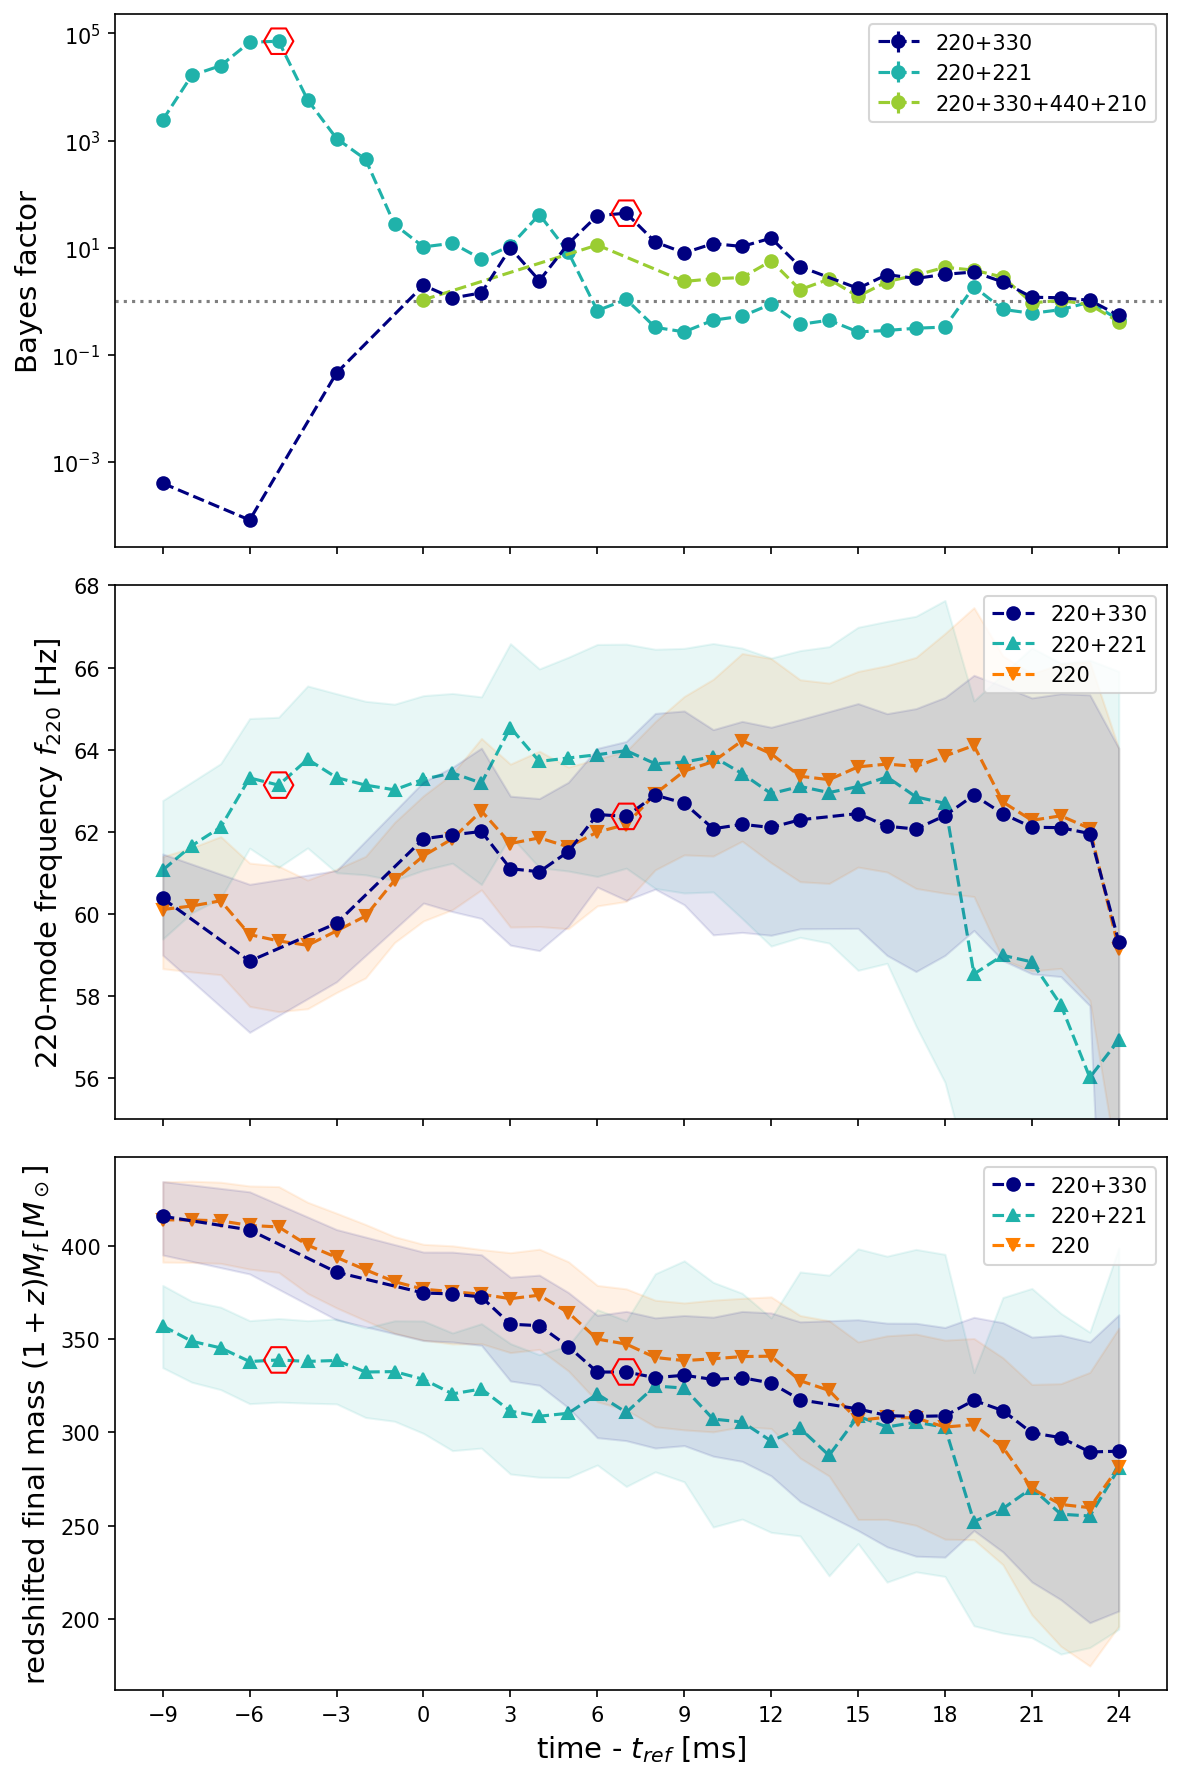

In [7]:
fig, ax = plt.subplots(3,1, sharex=True, figsize=(8,12), facecolor='w')

# Panel 1 #########################################
modes = ['220_330',
         '220_221',
         '220_330_440_210'
        ]
colours = ['navy', 'lightseagreen', 'yellowgreen']
markers = ['o', '^', 's', 'v']

for count, tmp_mode in enumerate(modes):
    zord = 3
    if tmp_mode == '220_330':
        zord = 4
    ax[0].errorbar([t for t in bayes_factors[tmp_mode]],
                   [bayes_factors[tmp_mode][t] for t in bayes_factors[tmp_mode]],
                   yerr=[[bf_error_low[tmp_mode][t] for t in bf_error_low[tmp_mode]],
                         [bf_error_high[tmp_mode][t] for t in bf_error_high[tmp_mode]]],
                   label=tmp_mode.replace('_','+'),
                   marker='o',
                   ls='--',
                   c=colours[count],
                   zorder=zord)


ax[0].scatter(7,
              bayes_factors['220_330'][7],
              marker='H',
              color='red',
              facecolor='none',
              s=200,
              zorder=5)

ax[0].scatter(-5,
              bayes_factors['220_221'][-5],
              marker='H',
              color='red',
              facecolor='none',
              s=200,
              zorder=5)

ax[0].axhline(1, color='k', alpha=0.5, ls=':')

ax[0]

ax[0].set_ylabel("Bayes factor", fontsize=14)
ax[0].legend(loc='best') #loc=(0.505, 0.35))
ax[0].set_xticks([-9,-6,-3,0,3,6,9,12,15,18,21,24])
ax[0].set_yscale("log")
#ax[0].set_xlim(4,25)
#ax[0].set_ylim(0.1,80)


# Panel 2 #########################################
modes = ['220_330',
         '220_221',
         '220'
        ]
colours = ['navy', 'lightseagreen', '#ff7f00']
markers = ['o', '^', 'v']
param = 'f220'

for count, mode in enumerate(modes):
    zord = 2
    if mode == '220_330':
        zord = 3

    ax[1].fill_between([t for t in median_vals[mode][param]],
                       [median_vals[mode][param][t] - error_low[mode][param][t] for t in median_vals[mode][param]],
                       [median_vals[mode][param][t] + error_high[mode][param][t] for t in median_vals[mode][param]],
                       alpha=0.1,
                       color=colours[count],
                       zorder=zord)

    ax[1].plot([t for t in median_vals[mode][param]],
               [median_vals[mode][param][t] for t in median_vals[mode][param]],
               label=mode.replace('_','+'),
               color=colours[count],
               marker=markers[count],
               ls='--',
               zorder=zord)

ax[1].scatter(-5,
              median_vals['220_221'][param][-5],
              marker='H',
              color='red',
              facecolor='none',
              s=200,
              zorder=4)

ax[1].scatter(7,
              median_vals['220_330'][param][7],
              marker='H',
              color='red',
              facecolor='none',
              s=200,
              zorder=4)

ax[1].set_ylabel("220-mode frequency $f_{220}$ [Hz]", fontsize=14)
ax[1].set_ylim(55,68)
ax[1].legend()


# Panel 3 #########################################
modes = ['220_330',
         '220_221',
         '220'
        ]
colours = ['navy', 'lightseagreen', '#ff7f00']
markers = ['o', '^', 'v']
param = 'final_mass'

for count, mode in enumerate(modes):
    zord = 2
    if mode == '220_330':
        zord = 3

    ax[2].fill_between([t for t in median_vals[mode][param]],
                       [median_vals[mode][param][t] - error_low[mode][param][t] for t in median_vals[mode][param]],
                       [median_vals[mode][param][t] + error_high[mode][param][t] for t in median_vals[mode][param]],
                       alpha=0.1,
                       color=colours[count],
                       zorder=zord)

    ax[2].plot([t for t in median_vals[mode][param]],
               [median_vals[mode][param][t] for t in median_vals[mode][param]],
               label=mode.replace('_','+'),
               color=colours[count],
               marker=markers[count],
               ls='--',
               zorder=zord)

ax[2].scatter(-5,
              median_vals['220_221'][param][-5],
              marker='H',
              color='red',
              facecolor='none',
              s=200,
              zorder=4)

ax[2].scatter(7,
              median_vals['220_330'][param][7],
              marker='H',
              color='red',
              facecolor='none',
              s=200,
              zorder=4)

ax[2].set_xlabel("time - $t_{\t{ref}}$ [ms]", fontsize=14)
ax[2].set_ylabel("redshifted final mass $(1+z)M_f \: [M_\odot]$", fontsize=14)
ax[2].legend()

fig.tight_layout()
fig.set_dpi(150)
fig.savefig("../figures/FigureS4.png", bbox_inches='tight')